In [1]:
print("Hello World!")

Hello World!


In [2]:
# importing relevant modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime

## Capital Bike Share

In [3]:
""""
This dataset contains the hourly and daily count of rental bikes between years 2022 and 2023 in Capital bikeshare system with the corresponding weather and seasonal information.

Additional Information aboutb the Variable.
Both hourly.csv and daily.csv have the following fields, except hour which is not available in daily.csv

 Casual: count of casual users
 Member: count of member users
 Date: Year:month:day
 Hour: (0 to 23)
 Total_rides: count of total rental bikes including both casual and members 
 relativehumidity_2m (%): Normalized humidity. The values are divided to 100
 temperature_2m (°C):Normalized temperature in Celsius
 apparent_temperature_mean (°C): Normalized feeling temperature in Celsius.
 weathercode (wmo code): represents different weather conditions. 
 windspeed_10m (km/h): Normalized wind speed 



"""

'"\nThis dataset contains the hourly and daily count of rental bikes between years 2022 and 2023 in Capital bikeshare system with the corresponding weather and seasonal information.\n\nAdditional Information aboutb the Variable.\nBoth hourly.csv and daily.csv have the following fields, except hour which is not available in daily.csv\n\n Casual: count of casual users\n Member: count of member users\n Date: Year:month:day\n Hour: (0 to 23)\n Total_rides: count of total rental bikes including both casual and members \n relativehumidity_2m (%): Normalized humidity. The values are divided to 100\n temperature_2m (°C):Normalized temperature in Celsius\n apparent_temperature_mean (°C): Normalized feeling temperature in Celsius.\n weathercode (wmo code): represents different weather conditions. \n windspeed_10m (km/h): Normalized wind speed \n\n\n\n'

## Loading Daily Dataset

In [4]:
# loading csv file
daily=pd.read_csv("CBS_2021-2023_Daily_Weather.csv", sep=None)

C:\Users\godwi\AppData\Local\Temp\ipykernel_13320\2472823599.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  daily=pd.read_csv("CBS_2021-2023_Daily_Weather.csv", sep=None)


In [5]:
# getting summary of Data set
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Casual                          1095 non-null   int64  
 1   Date                            1095 non-null   object 
 2   Member                          1095 non-null   int64  
 3   Total_rides                     1095 non-null   int64  
 4   apparent_temperature_mean (°C)  1095 non-null   float64
 5   temperature_2m_mean (°C)        1095 non-null   float64
 6   weathercode (wmo code)          1095 non-null   int64  
 7   windspeed_10m_max (km/h)        1095 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 68.6+ KB


In [6]:
daily.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [7]:
# getting the statistics of the Dataset
daily.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Casual,1095.0,3836.72,2114.90,174.0,2122.00,3595.0,5321.00,12839.0
Member,1095.0,5929.49,2419.27,323.0,4292.50,5848.0,7577.00,12580.0
Total_rides,1095.0,9766.21,4129.63,497.0,6741.50,9759.0,13020.00,20174.0
apparent_temperature_mean (°C),1095.0,12.84,11.89,-15.2,2.70,13.1,23.40,34.7
temperature_2m_mean (°C),1095.0,14.41,9.67,-9.1,6.25,14.9,22.75,34.7
weathercode (wmo code),1095.0,24.39,27.77,0.0,1.00,3.0,53.00,75.0
windspeed_10m_max (km/h),1095.0,16.05,5.88,5.6,11.70,14.7,19.40,40.1


In [8]:
#getting the shape of the DataFrame
daily.shape

(1095, 8)

## Data Wrangling

Renaming some features

In [9]:
## renaming some features
daily.rename(columns={'Member': 'Registered'}, inplace=True)
## renaming some features
daily.rename(columns={"relativehumidity_2m (%)":"Relativehumidity_2m (%)",	"temperature_2m_mean (°C)":"Temperature_2m_mean (°C)",	"windspeed_10m_max (km/h)":"Windspeed_10m_max (km/h)","apparent_temperature_mean (°C)":"Apparent_temperature_mean (°C)","weathercode (wmo code)":"Weathercode (wmo code)","windspeed_10m (km/h)":"Windspeed_10m (km/h)"}, inplace=True)

In [10]:
daily.head(1)

,Casual,Date,Registered,Total_rides,Apparent_temperature_mean (°C),Temperature_2m_mean (°C),Weathercode (wmo code),Windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6


In [11]:
# convert some features to correct Data type 
daily['Casual'] = daily['Casual'].astype(int)
daily['Registered'] = daily['Registered'].astype(int)
daily['Total_rides'] = daily['Total_rides'].astype(int)

In [12]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Casual                          1095 non-null   int32  
 1   Date                            1095 non-null   object 
 2   Registered                      1095 non-null   int32  
 3   Total_rides                     1095 non-null   int32  
 4   Apparent_temperature_mean (°C)  1095 non-null   float64
 5   Temperature_2m_mean (°C)        1095 non-null   float64
 6   Weathercode (wmo code)          1095 non-null   int64  
 7   Windspeed_10m_max (km/h)        1095 non-null   float64
dtypes: float64(3), int32(3), int64(1), object(1)
memory usage: 55.7+ KB


### Checking for Missing values

In [13]:
## checking for missing values in Data Set
daily.isnull().sum()
## There are no Missing values 

Casual                            0
Date                              0
Registered                        0
Total_rides                       0
Apparent_temperature_mean (°C)    0
Temperature_2m_mean (°C)          0
Weathercode (wmo code)            0
Windspeed_10m_max (km/h)          0
dtype: int64

## Creating of new columns

In [14]:
## Weather

# adding new column with user friendly translation of WMO Code
daily['Weather'] = daily['Weathercode (wmo code)'].apply(lambda value: 'Clear'
if value == 0 else 'Clear'
if value == 1 else 'Clear'
if value == 3 else 'Cloudy'
if value == 2 else 'Clear'
if value == 51 else 'Drizzle'
if value == 53 else 'Drizzle'
if value == 55 else 'Drizzle'
if value == 61 else 'Rain'
if value == 63 else 'Rain'
if value == 65 else 'Rain'
if value == 71 else 'Snowy'
if value == 73 else 'Snowy'
if value == 75 else 'Snowy')

In [15]:
def categorize_Weather(Weather):
    if Weather in ['Clear']:
        return 1
    else:
        return 0

# Apply this function to create a new column 
daily['Clear Weather'] = daily['Weather'].apply(categorize_Weather)

def categorize_Weather(Weather):
    if Weather in ['Cloudy']:
        return 1
    else:
        return 0

# Apply this function to create a new column 
daily['Cloudy Weather'] = daily['Weather'].apply(categorize_Weather)

def categorize_Weather(Weather):
    if Weather in ['Drizzle']:
        return 1
    else:
        return 0

# Apply this function to create a new column 
daily['Drizzle Weather'] = daily['Weather'].apply(categorize_Weather)

def categorize_Weather(Weather):
    if Weather in ['Rain']:
        return 1
    else:
        return 0

# Apply this function to create a new column 
daily['Rainy Weather'] = daily['Weather'].apply(categorize_Weather)

def categorize_Weather(Weather):
    if Weather in ['Snowy']:
        return 1
    else:
        return 0

# Apply this function to create a new column 
daily['Snowy Weather'] = daily['Weather'].apply(categorize_Weather)





In [16]:
daily.head()

,Casual,Date,Registered,Total_rides,Apparent_temperature_mean (°C),Temperature_2m_mean (°C),Weathercode (wmo code),Windspeed_10m_max (km/h),Weather,Clear Weather,Cloudy Weather,Drizzle Weather,Rainy Weather,Snowy Weather
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,Rain,0,0,0,1,0
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,Drizzle,0,0,1,0,0
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,Rain,0,0,0,1,0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,Clear,1,0,0,0,0
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,Clear,1,0,0,0,0


In [17]:
#Year
# Extract year from the 'Date' column
daily['Year'] = pd.to_datetime(daily['Date']).dt.year

In [18]:
#Season
# Function to get season
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"

# Function to categorize season based on date
def categorize_season(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    month = dt.month
    return get_season(month)

# Apply function to create a new column
daily['Season'] = daily['Date'].apply(categorize_season)



In [19]:
##WEEKDAY
# Function to get weekday
def get_weekday(day):
    weekdays = ["Mon.", "Tue.", "Wed.", "Thur.", "Fri.", "Sat.", "Sun."]
    return weekdays[day]

# Function to categorize weekday based on date
def categorize_week(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    weekday = dt.weekday()  # 0 for Monday, 1 for Tuesday, ..., 6 for Sunday
    return get_weekday(weekday)

# Apply function to create a new column
daily['Weekday'] = daily['Date'].apply(categorize_week)

In [20]:
def categorize_day(Weekday):
    if Weekday in ['Mon.', 'Tue.', 'Wed.', 'Thur.', 'Fri.']:
        return 'Workingday'
    else:
        return 'Weekend'

# Apply this function to create a new column 'Day_cat'
daily['Workingday'] = daily['Weekday'].apply(categorize_day)


In [21]:
daily.loc[daily['Workingday'] == "Weekend", 'Workingday'] = 'No'
daily.loc[daily['Workingday'] == "Workingday", 'Workingday'] = 'Yes'

In [22]:
## Working_day

def categorize_Weekday(Weekday):
    if Weekday in ['Mon.', 'Tue.', 'Wed.', 'Thur.', 'Fri.']:
        return 1
    else:
        return 0

# Apply this function to create a new column 
daily['Working_day'] = daily['Weekday'].apply(categorize_Weekday)


def categorize_Weekday(Weekday):
    if Weekday in ['Sun.', 'Sat.']:
        return 1
    else:
        return 0

# Apply this function to create a new column 
daily['Weekend'] = daily['Weekday'].apply(categorize_Weekday)



In [23]:
#Month
# Function to get month
def get_month(month):
    months = ["Jan.", "Feb.", "Mar.", "Apr.", "May", "Jun.", "Jul.", "Aug.", "Sep.", "Oct.", "Nov.", "Dec."]
    return months[month - 1]

# Function to categorize month based on date
def categorize_month(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    month = dt.month
    return get_month(month)

# Apply function to create a new column
daily['Month'] = daily['Date'].apply(categorize_month)

In [24]:
daily.head()

,Casual,Date,Registered,Total_rides,Apparent_temperature_mean (°C),Temperature_2m_mean (°C),Weathercode (wmo code),Windspeed_10m_max (km/h),Weather,Clear Weather,...,Drizzle Weather,Rainy Weather,Snowy Weather,Year,Season,Weekday,Workingday,Working_day,Weekend,Month
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,Rain,0,...,0,1,0,2021,Winter,Fri.,Yes,1,0,Jan.
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,Drizzle,0,...,1,0,0,2021,Winter,Sat.,No,0,1,Jan.
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,Rain,0,...,0,1,0,2021,Winter,Sun.,No,0,1,Jan.
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,Clear,1,...,0,0,0,2021,Winter,Mon.,Yes,1,0,Jan.
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,Clear,1,...,0,0,0,2021,Winter,Tue.,Yes,1,0,Jan.


2021 Data Frame

In [25]:
# Convert 'Date' column to datetime type
daily['Date'] = pd.to_datetime(daily['Date'])

# Filter the DataFrame for rows where the year is 2021
daily_2021 = daily[daily['Date'].dt.year == 2021]


In [26]:
daily_2021.shape

(365, 21)

In [27]:
# resetting index
daily_2021.reset_index(inplace=True)
#dropping the index column
daily_2021.drop(["index"],axis=1, inplace=True)

C:\Users\godwi\AppData\Local\Temp\ipykernel_13320\3999199966.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_2021.drop(["index"],axis=1, inplace=True)


In [28]:
daily_2021.shape

(365, 21)

2022 DataFrame

In [29]:
# Convert 'Date' column to datetime type
daily['Date'] = pd.to_datetime(daily['Date'])

# Filter the DataFrame for rows where the year is 2022
daily_2022 = daily[daily['Date'].dt.year == 2022]


In [30]:
# resetting index
daily_2022.reset_index(inplace=True)
#dropping the index column
daily_2022.drop(["index"],axis=1, inplace=True)

C:\Users\godwi\AppData\Local\Temp\ipykernel_13320\2756519225.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_2022.drop(["index"],axis=1, inplace=True)


In [31]:
daily_2022.shape

(365, 21)

2023 Data Frame

In [32]:
# Convert 'Date' column to datetime type
daily['Date'] = pd.to_datetime(daily['Date'])

# Filter the DataFrame for rows where the year is 2023
daily_2023 = daily[daily['Date'].dt.year == 2023]


In [33]:
# resetting index
daily_2023.reset_index(inplace=True)
#dropping the index column
daily_2023.drop(["index"],axis=1, inplace=True)

C:\Users\godwi\AppData\Local\Temp\ipykernel_13320\2160153949.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_2023.drop(["index"],axis=1, inplace=True)


In [34]:
daily_2023.shape

(365, 21)

In [89]:
daily.head(2)

,Casual,Date,Registered,Total_rides,Apparent_temperature_mean (°C),Temperature_2m_mean (°C),Weathercode (wmo code),Windspeed_10m_max (km/h),Weather,Clear Weather,...,Drizzle Weather,Rainy Weather,Snowy Weather,Year,Season,Weekday,Workingday,Working_day,Weekend,Month
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,Rain,0,...,0,1,0,2021,Winter,Fri.,Yes,1,0,Jan.
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,Drizzle,0,...,1,0,0,2021,Winter,Sat.,No,0,1,Jan.


## Exploratory Data Analysis

Some Hypotheses formulation

In [35]:
"""""
Hourly trend: most of the businesses have rush hours and weak hours. It should not be an exception for bike rentals as well.

Daily Trend: weekdays vs weekends and registered users vs casual users.

Relative humdity: the demand for bikes might be changed on a rainy day as compared to a sunny day. Similarly, people prefer to go out on less humid days.

Temperature: in warm countries, temperature generally keeps people inside.

Business model: businesses often rely on customers who are members more than casual users. There might be some interesting insights that can strengthen this assumption.
"""

'""\nHourly trend: most of the businesses have rush hours and weak hours. It should not be an exception for bike rentals as well.\n\nDaily Trend: weekdays vs weekends and registered users vs casual users.\n\nRelative humdity: the demand for bikes might be changed on a rainy day as compared to a sunny day. Similarly, people prefer to go out on less humid days.\n\nTemperature: in warm countries, temperature generally keeps people inside.\n\nBusiness model: businesses often rely on customers who are members more than casual users. There might be some interesting insights that can strengthen this assumption.\n'

In [36]:
daily_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Casual                          365 non-null    int32         
 1   Date                            365 non-null    datetime64[ns]
 2   Registered                      365 non-null    int32         
 3   Total_rides                     365 non-null    int32         
 4   Apparent_temperature_mean (°C)  365 non-null    float64       
 5   Temperature_2m_mean (°C)        365 non-null    float64       
 6   Weathercode (wmo code)          365 non-null    int64         
 7   Windspeed_10m_max (km/h)        365 non-null    float64       
 8   Weather                         365 non-null    object        
 9   Clear Weather                   365 non-null    int64         
 10  Cloudy Weather                  365 non-null    int64         
 11  Drizzl

Weekday Analysis

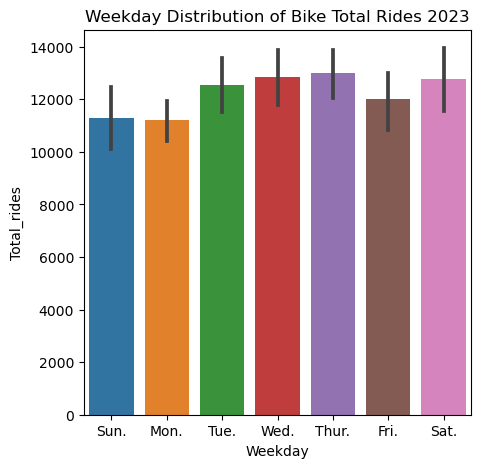

In [37]:
plt.figure(figsize=(5, 5))
sns.barplot(x="Weekday", y="Total_rides", data=daily_2023)
plt.title("Weekday Distribution of Bike Total Rides 2023")
plt.show()

Season Analysis

Text(0.5, 1.0, 'Season wise  Distribution of Bike Total Rides 2023')

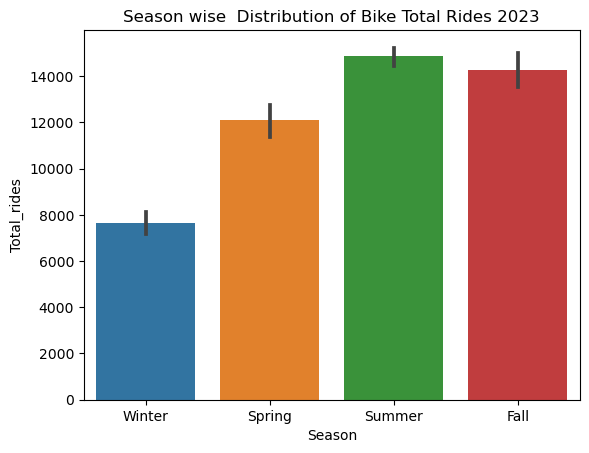

In [38]:
sns.barplot(x="Season", y="Total_rides",
             #hue="Season",
             data=daily_2023,)
plt.title("Season wise  Distribution of Bike Total Rides 2023")

In [39]:
daily_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Casual                          365 non-null    int32         
 1   Date                            365 non-null    datetime64[ns]
 2   Registered                      365 non-null    int32         
 3   Total_rides                     365 non-null    int32         
 4   Apparent_temperature_mean (°C)  365 non-null    float64       
 5   Temperature_2m_mean (°C)        365 non-null    float64       
 6   Weathercode (wmo code)          365 non-null    int64         
 7   Windspeed_10m_max (km/h)        365 non-null    float64       
 8   Weather                         365 non-null    object        
 9   Clear Weather                   365 non-null    int64         
 10  Cloudy Weather                  365 non-null    int64         
 11  Drizzl

In [40]:
#Categorical Variables:

#Explore distribution of rides by categorical variables such as season, weather conditions, holidays, etc. using bar plots or count plots.

season_analysis_2023=daily_2023.iloc[:,[15,0,2,3]]

In [41]:
season_analysis_2023_copy= season_analysis_2023.copy()
season_analysis_2023

,Season,Casual,Registered,Total_rides
0,Winter,3573,3214,6787
1,Winter,3433,3807,7240
2,Winter,2635,4924,7559
3,Winter,2488,5303,7791
4,Winter,2954,5455,8409
...,...,...,...,...
360,Winter,646,1934,2580
361,Winter,3099,4819,7918
362,Winter,3491,5168,8659
363,Winter,3097,4497,7594


In [42]:
season_analysis_result=season_analysis_2023.groupby("Season").sum()

Text(0.5, 1.0, 'Season Analysis 2023')

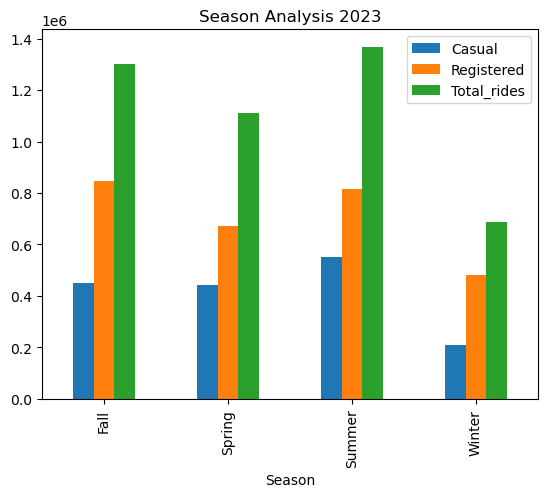

In [43]:
#sns.barplot(data=season_analysis_result)
season_analysis_result.plot.bar()
plt.title("Season Analysis 2023")

In [44]:
season_analysis_2023_copy.drop(["Total_rides"], axis=1, inplace=True)


In [45]:
season_analysis_2023_copy

,Season,Casual,Registered
0,Winter,3573,3214
1,Winter,3433,3807
2,Winter,2635,4924
3,Winter,2488,5303
4,Winter,2954,5455
...,...,...,...
360,Winter,646,1934
361,Winter,3099,4819
362,Winter,3491,5168
363,Winter,3097,4497


Main Users Analysis

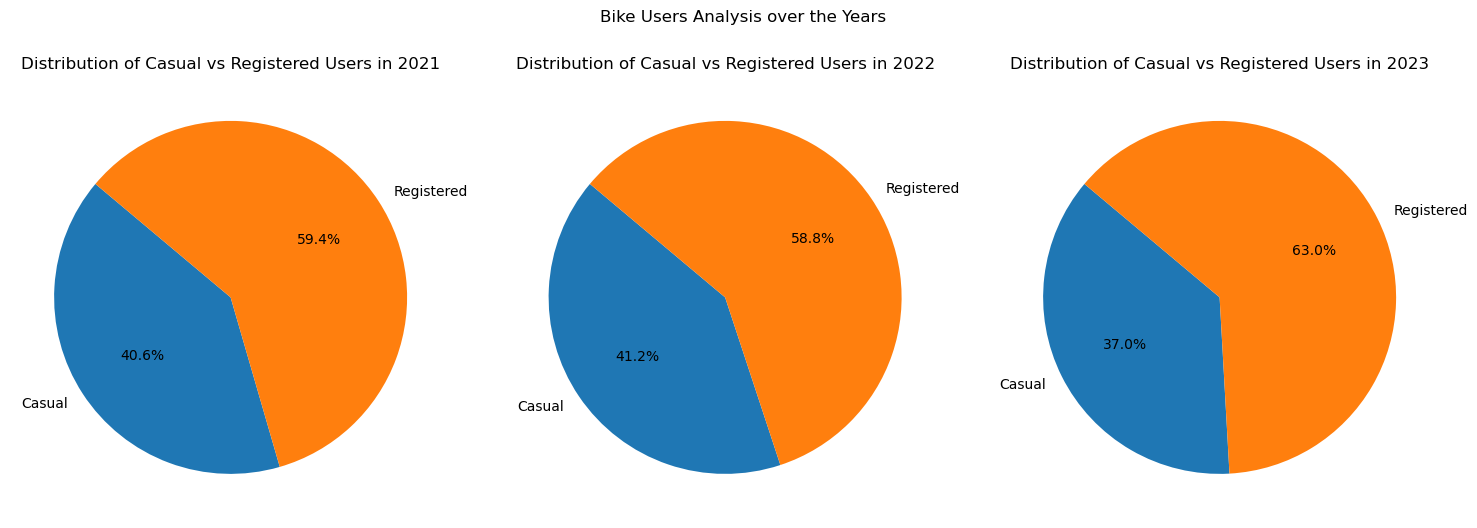

In [46]:
import matplotlib.pyplot as plt

# Assuming daily_2021 is a DataFrame containing the daily user data for 2023
sizes = daily_2021[['Casual', 'Registered']].sum()  # Calculate the total number of casual and registered users
sizes0=daily_2022[['Casual', 'Registered']].sum()
sizes1=daily_2023[['Casual', 'Registered']].sum()
labels = ['Casual', 'Registered']

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Plot the pie chart for the first subplot
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Distribution of Casual vs Registered Users in 2021')

axes[1].pie(sizes0, labels=labels, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Distribution of Casual vs Registered Users in 2022')

axes[2].pie(sizes1, labels=labels, autopct='%1.1f%%', startangle=140)
axes[2].set_title('Distribution of Casual vs Registered Users in 2023')

# Plot the pie chart for the second subplot
# You can modify the code here to create additional plots if needed

# Plot the pie chart for the third subplot
# You can modify the code here to create additional plots if needed

# Adjust layout
plt.tight_layout()
plt.suptitle("Bike Users Analysis over the Years")
# Show the plot
plt.show()


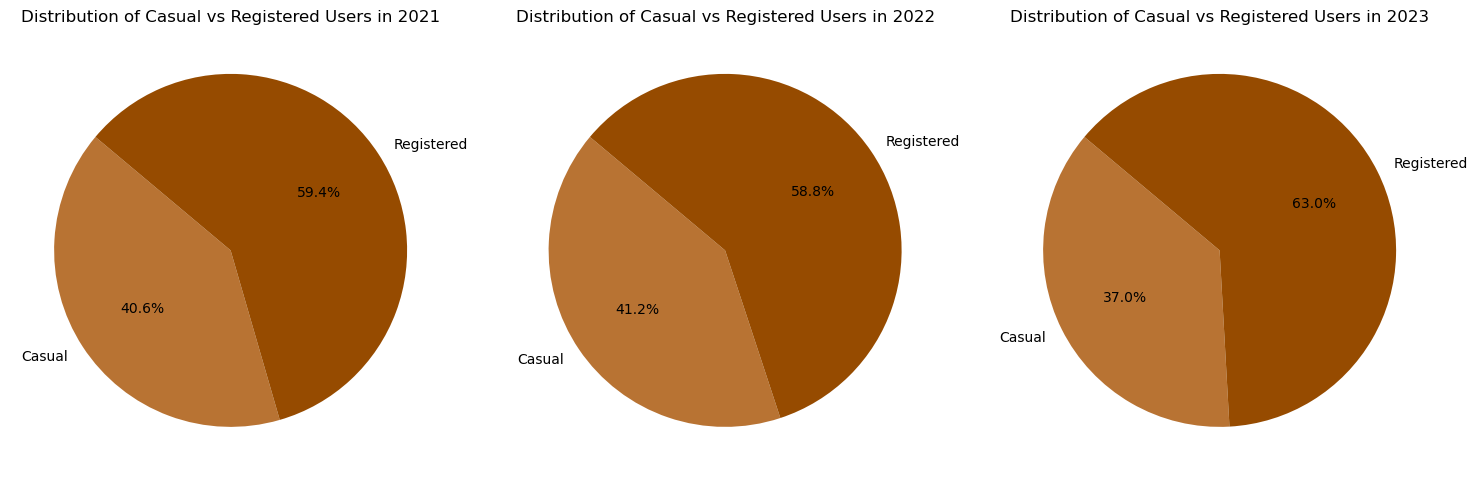

In [48]:
import matplotlib.pyplot as plt

# Assuming daily_2021 is a DataFrame containing the daily user data for 2021
sizes = daily_2021[['Casual', 'Registered']].sum()  # Calculate the total number of casual and registered users
sizes0 = daily_2022[['Casual', 'Registered']].sum()
sizes1 = daily_2023[['Casual', 'Registered']].sum()
labels = ['Casual', 'Registered']

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Define colors
colors = ['#b87333', '#964b00']  # Copper and brown colors

# Plot the pie chart for the first subplot
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
axes[0].set_title('Distribution of Casual vs Registered Users in 2021')

# Plot the pie chart for the second subplot
axes[1].pie(sizes0, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
axes[1].set_title('Distribution of Casual vs Registered Users in 2022')

# Plot the pie chart for the third subplot
axes[2].pie(sizes1, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
axes[2].set_title('Distribution of Casual vs Registered Users in 2023')

# Adjust layout
plt.tight_layout()


# Show the plot
plt.show()


Apperent Temperature Analysis

In [52]:
daily.head()

,Casual,Date,Registered,Total_rides,Apparent_temperature_mean (°C),Temperature_2m_mean (°C),Weathercode (wmo code),Windspeed_10m_max (km/h),Weather,Clear Weather,...,Drizzle Weather,Rainy Weather,Snowy Weather,Year,Season,Weekday,Workingday,Working_day,Weekend,Month
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,Rain,0,...,0,1,0,2021,Winter,Fri.,Yes,1,0,Jan.
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,Drizzle,0,...,1,0,0,2021,Winter,Sat.,No,0,1,Jan.
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,Rain,0,...,0,1,0,2021,Winter,Sun.,No,0,1,Jan.
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,Clear,1,...,0,0,0,2021,Winter,Mon.,Yes,1,0,Jan.
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,Clear,1,...,0,0,0,2021,Winter,Tue.,Yes,1,0,Jan.


Text(0.5, 1.0, 'Ride Count based on Daily Apperent Temperature in 2023')

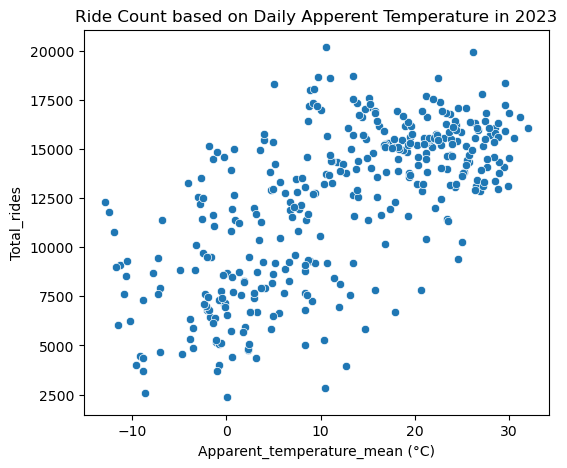

In [53]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="Apparent_temperature_mean (°C)", y="Total_rides",
      
             data=daily_2023)
plt.title("Ride Count based on Daily Apperent Temperature in 2023")

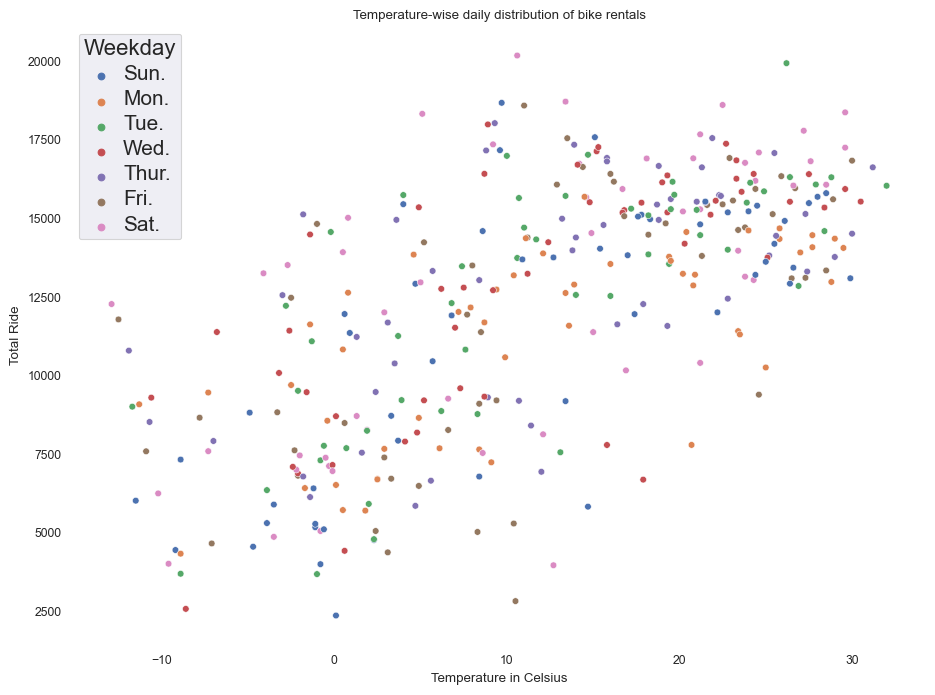

In [54]:
sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
#sns.set_style("darkgrid")
# Remove grid lines


#fig, ax = plt.subplots()
ax = sns.scatterplot(data = daily_2023, x = 'Apparent_temperature_mean (°C)', y = 'Total_rides',
               hue = 'Weekday');

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.grid(False)

# Remove background color
ax.set_facecolor('none')

ax.set(title = 'Temperature-wise daily distribution of bike rentals',ylabel= 'Total Ride', xlabel='Temperature in Celsius')
plt.savefig("Temperature-wise daily distribution of bike rentals", dpi = 80)

In [55]:
daily_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Casual                          365 non-null    int32         
 1   Date                            365 non-null    datetime64[ns]
 2   Registered                      365 non-null    int32         
 3   Total_rides                     365 non-null    int32         
 4   Apparent_temperature_mean (°C)  365 non-null    float64       
 5   Temperature_2m_mean (°C)        365 non-null    float64       
 6   Weathercode (wmo code)          365 non-null    int64         
 7   Windspeed_10m_max (km/h)        365 non-null    float64       
 8   Weather                         365 non-null    object        
 9   Clear Weather                   365 non-null    int64         
 10  Cloudy Weather                  365 non-null    int64         
 11  Drizzl

Windspeed Analysis

Text(0.5, 1.0, 'Windspeed Distribution of Bike Total Rides 2023')

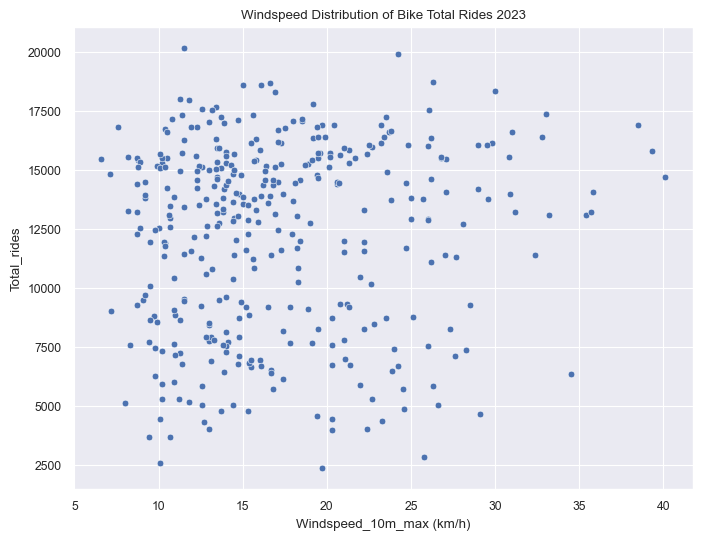

In [56]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Windspeed_10m_max (km/h)", y="Total_rides",
             #hue="Season",
             data=daily_2023)
plt.title("Windspeed Distribution of Bike Total Rides 2023")

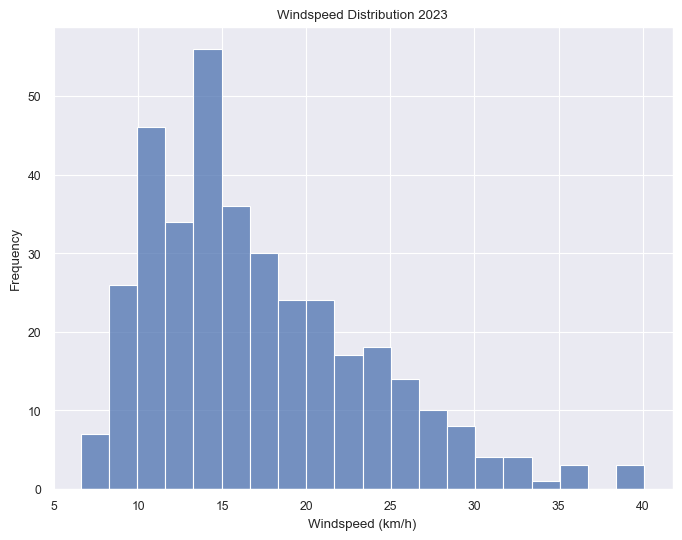

In [57]:
plt.figure(figsize=(8, 6))
sns.histplot(x="Windspeed_10m_max (km/h)", data=daily_2023, bins=20)
plt.title("Windspeed Distribution 2023")
plt.xlabel("Windspeed (km/h)")
plt.ylabel("Frequency")
plt.show()

In [58]:
daily.head()

,Casual,Date,Registered,Total_rides,Apparent_temperature_mean (°C),Temperature_2m_mean (°C),Weathercode (wmo code),Windspeed_10m_max (km/h),Weather,Clear Weather,...,Drizzle Weather,Rainy Weather,Snowy Weather,Year,Season,Weekday,Workingday,Working_day,Weekend,Month
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,Rain,0,...,0,1,0,2021,Winter,Fri.,Yes,1,0,Jan.
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,Drizzle,0,...,1,0,0,2021,Winter,Sat.,No,0,1,Jan.
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,Rain,0,...,0,1,0,2021,Winter,Sun.,No,0,1,Jan.
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,Clear,1,...,0,0,0,2021,Winter,Mon.,Yes,1,0,Jan.
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,Clear,1,...,0,0,0,2021,Winter,Tue.,Yes,1,0,Jan.


In [59]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Casual                          1095 non-null   int32         
 1   Date                            1095 non-null   datetime64[ns]
 2   Registered                      1095 non-null   int32         
 3   Total_rides                     1095 non-null   int32         
 4   Apparent_temperature_mean (°C)  1095 non-null   float64       
 5   Temperature_2m_mean (°C)        1095 non-null   float64       
 6   Weathercode (wmo code)          1095 non-null   int64         
 7   Windspeed_10m_max (km/h)        1095 non-null   float64       
 8   Weather                         1095 non-null   object        
 9   Clear Weather                   1095 non-null   int64         
 10  Cloudy Weather                  1095 non-null   int64         
 11  Driz

Weather Heatmap

In [60]:
daily_corr_heatmap=daily.iloc[:,[13,12,11,10,9,7,5,4,3]]


In [61]:
daily_corr_heatmap.head(1)

,Snowy Weather,Rainy Weather,Drizzle Weather,Cloudy Weather,Clear Weather,Windspeed_10m_max (km/h),Temperature_2m_mean (°C),Apparent_temperature_mean (°C),Total_rides
0,0,1,0,0,0,10.6,2.3,-0.9,961


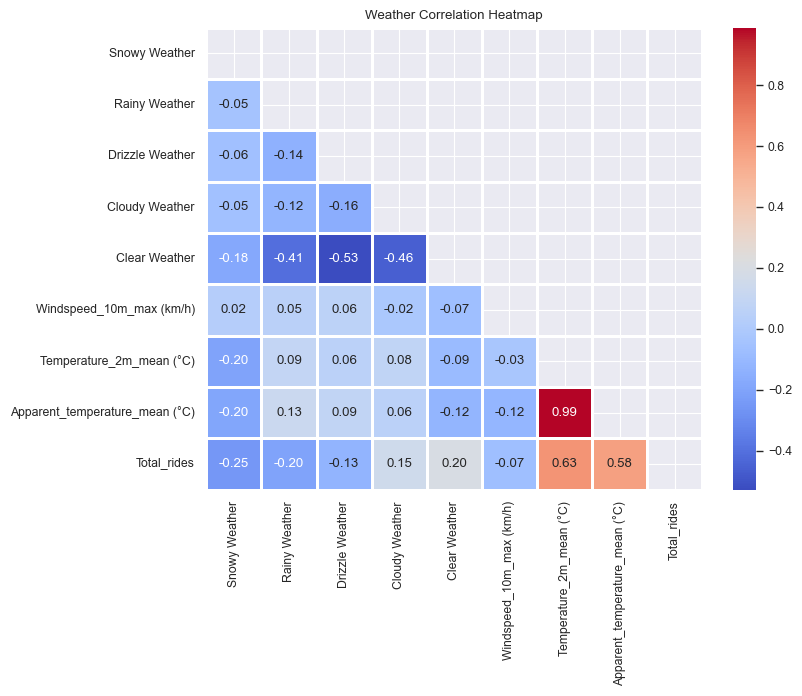

In [62]:
# Calculate correlation matrix
corr_matrix = daily_corr_heatmap.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap with the mask
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.9)
plt.title('Weather Correlation Heatmap')
plt.show()

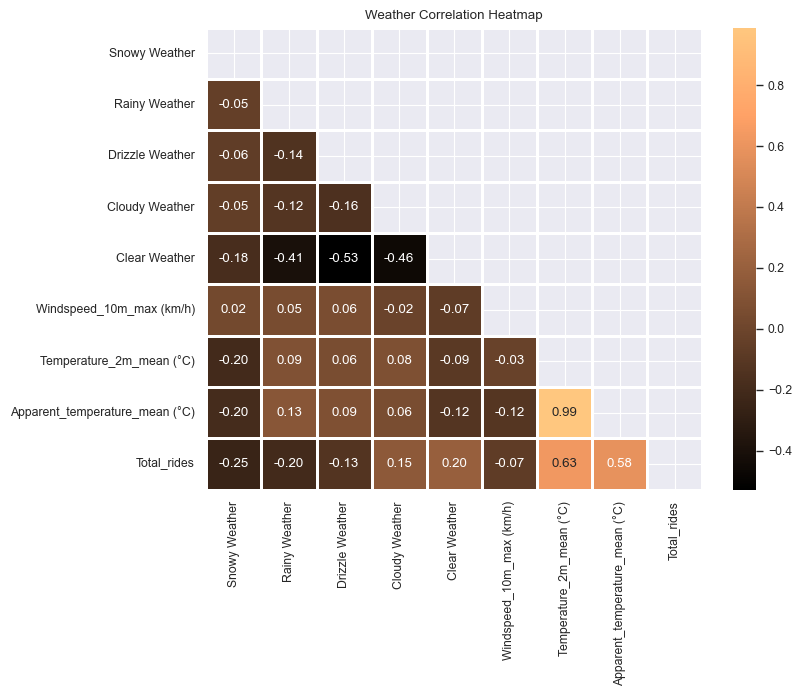

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate correlation matrix
corr_matrix = daily_corr_heatmap.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap with the mask
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='copper', fmt=".2f", linewidths=0.9)
plt.title('Weather Correlation Heatmap')
plt.show()


In [64]:
daily.head()

,Casual,Date,Registered,Total_rides,Apparent_temperature_mean (°C),Temperature_2m_mean (°C),Weathercode (wmo code),Windspeed_10m_max (km/h),Weather,Clear Weather,...,Drizzle Weather,Rainy Weather,Snowy Weather,Year,Season,Weekday,Workingday,Working_day,Weekend,Month
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,Rain,0,...,0,1,0,2021,Winter,Fri.,Yes,1,0,Jan.
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,Drizzle,0,...,1,0,0,2021,Winter,Sat.,No,0,1,Jan.
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,Rain,0,...,0,1,0,2021,Winter,Sun.,No,0,1,Jan.
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,Clear,1,...,0,0,0,2021,Winter,Mon.,Yes,1,0,Jan.
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,Clear,1,...,0,0,0,2021,Winter,Tue.,Yes,1,0,Jan.


In [90]:
daily.to_csv("daily_ml.csv", index=False)

Bike sharing growth Analysis based on Total rides over the Years

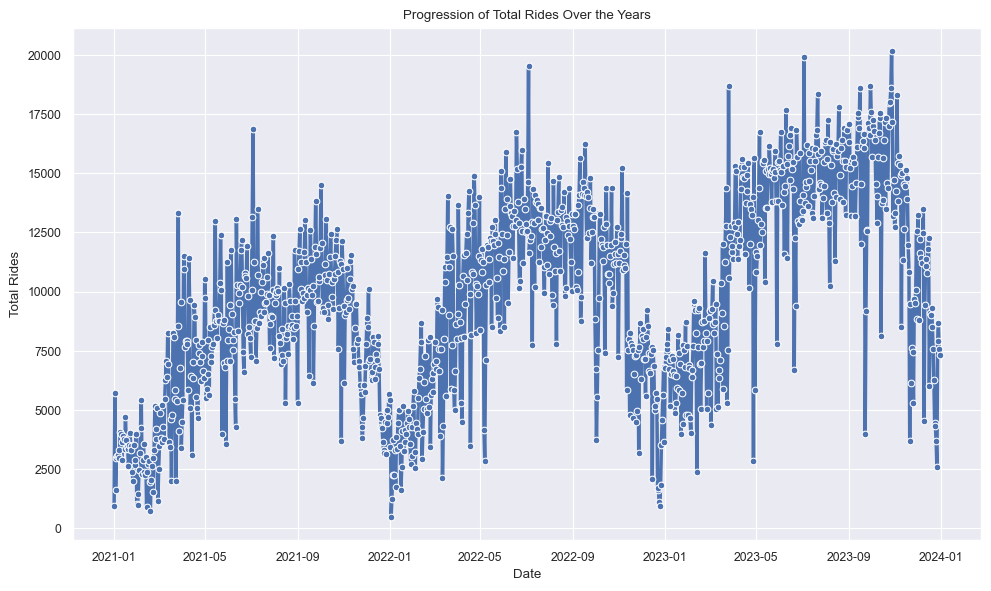

In [65]:
import matplotlib.pyplot as plt
import pandas as pd



plt.figure(figsize=(10, 6))
#sns.lineplot(data=daily, x='Date', y='Total_rides', marker='o', linestyle='-')
sns.lineplot(data=daily, x='Date', y='Total_rides', marker='o')
# Title and labels
plt.title('Progression of Total Rides Over the Years')
plt.xlabel('Date')
plt.ylabel('Total Rides')

# Show the plot
plt.grid(True)
plt.tight_layout()  # <-- Added the closing parenthesis here
plt.show()

Text(0.5, 1.0, 'Bike Share Growth Based On Total Rides')

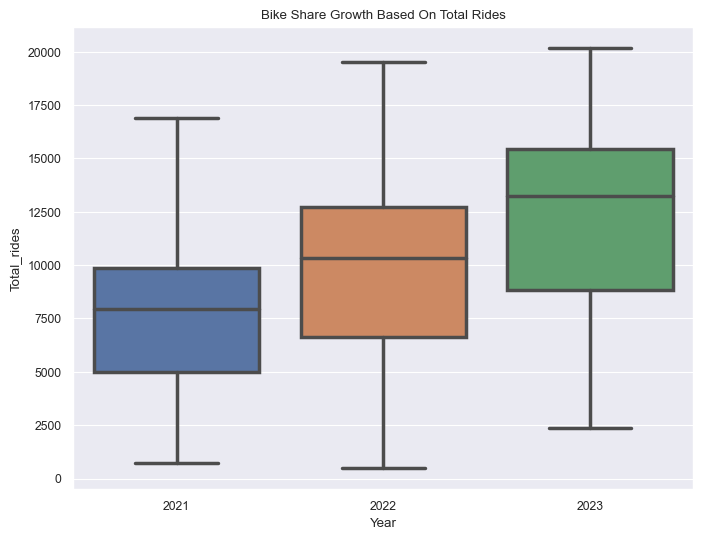

In [67]:
plt.figure(figsize=(8,6))
sns.boxplot(daily, x="Year",y="Total_rides")
plt.title("Bike Share Growth Based On Total Rides")

Text(0.5, 1.0, 'Workingday Analysis 2021 -2023')

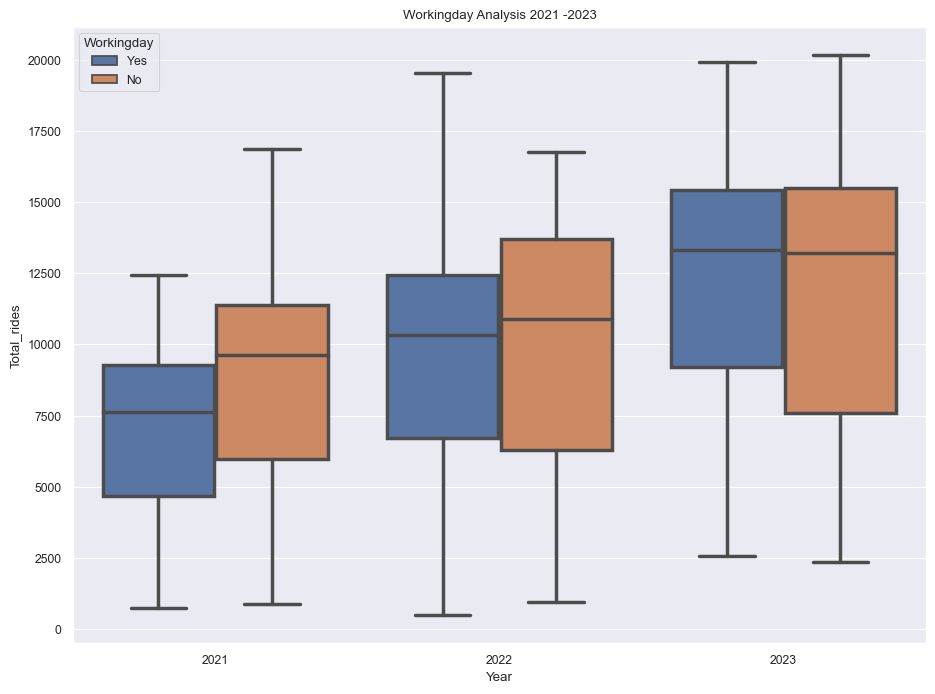

In [68]:
sns.boxplot(daily, x="Year",y="Total_rides", hue="Workingday")
plt.title("Workingday Analysis 2021 -2023")

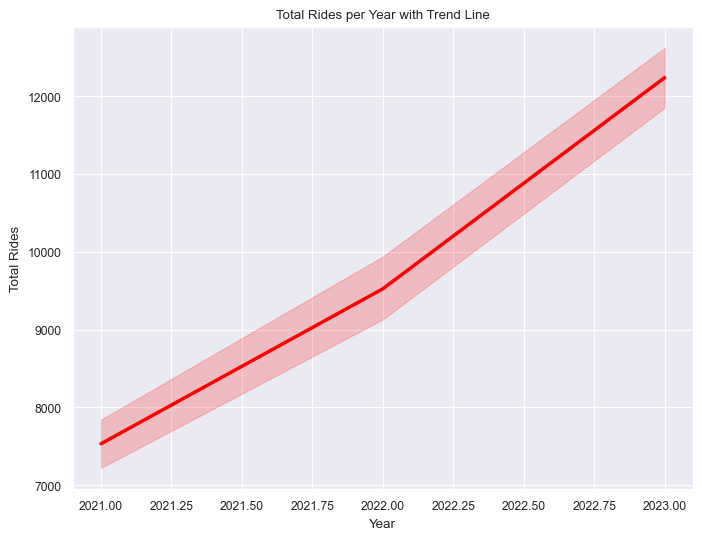

In [69]:
# Plot the responses for different events and regions
#sns.barplot(x="Year", y="Total_rides",
        
 #            data=daily)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'daily' is your DataFrame with columns 'Year' and 'Total_rides'

# Create the bar plot
#sns.barplot(x="Year", y="Total_rides", data=daily)
plt.figure(figsize=(8, 6))
# Add a trend line using regplot
sns.lineplot(x="Year", y="Total_rides", data=daily,  color='red')

# Title and labels
plt.title('Total Rides per Year with Trend Line')
plt.xlabel('Year')
plt.ylabel('Total Rides')

# Show the plot
plt.show()


<Axes: xlabel='Year', ylabel='Total_rides'>

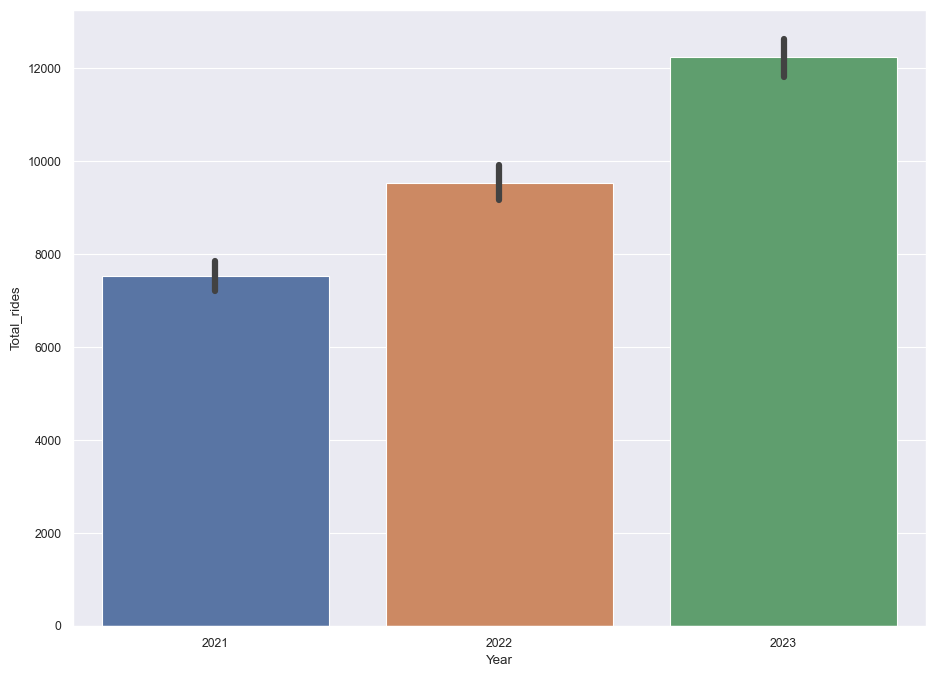

In [70]:
# Create the bar plot
sns.barplot(x="Year", y="Total_rides", data=daily)

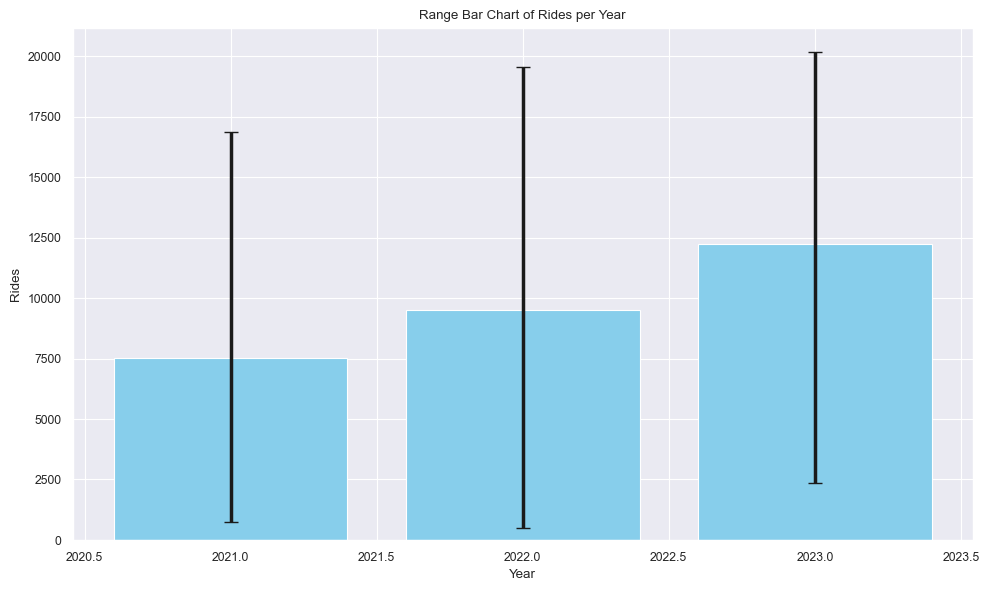

In [71]:
import matplotlib.pyplot as plt

# Assuming 'daily' is your DataFrame with columns 'Year' and 'Total_rides'

# Calculate mean, min, and max rides for each year
mean_rides = daily.groupby('Year')['Total_rides'].mean()
min_rides = daily.groupby('Year')['Total_rides'].min()
max_rides = daily.groupby('Year')['Total_rides'].max()

# Calculate error bars
yerr = [mean_rides - min_rides, max_rides - mean_rides]

# Create the range bar chart
plt.figure(figsize=(10, 6))
plt.bar(mean_rides.index, mean_rides, yerr=yerr, capsize=5, color='skyblue')

# Title and labels
plt.title('Range Bar Chart of Rides per Year')
plt.xlabel('Year')
plt.ylabel('Rides')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [72]:
daily_2023.describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
Casual,365.0,4528.69,646.0,2853.0,4717.0,5755.0,11550.0,2054.54
Date,365,2023-07-02 00:00:00,2023-01-01 00:00:00,2023-04-02 00:00:00,2023-07-02 00:00:00,2023-10-01 00:00:00,2023-12-31 00:00:00,NaN
Registered,365.0,7710.58,1713.0,5964.0,8124.0,9356.0,12580.0,2363.84
Total_rides,365.0,12239.27,2369.0,8819.0,13250.0,15442.0,20174.0,3983.05
Apparent_temperature_mean (°C),365.0,11.84,-12.9,2.4,12.4,21.5,32.0,11.24
Temperature_2m_mean (°C),365.0,14.53,-8.7,6.1,14.9,22.7,34.7,10.28
Weathercode (wmo code),365.0,17.0,0.0,1.0,2.0,51.0,73.0,24.81
Windspeed_10m_max (km/h),365.0,17.14,6.6,12.5,15.5,21.0,40.1,6.46
Clear Weather,365.0,0.68,0.0,0.0,1.0,1.0,1.0,0.47
Cloudy Weather,365.0,0.14,0.0,0.0,0.0,0.0,1.0,0.35


In [73]:
daily_2021["Total_rides"].mean().round(2)

7533.92

In [74]:
daily_2022["Total_rides"].mean().round(2)

9525.43

In [75]:
daily_2023["Total_rides"].mean().round(2)

12239.27

In [76]:
def calculate_growth_rate(original_value, new_value):
    growth_rate = ((new_value - original_value) / original_value) * 100
    return growth_rate

# Example usage:
original_value = 3405.76
new_value = 12239.27
growth_rate = calculate_growth_rate(original_value, new_value)
print("Growth rate:", growth_rate)


Growth rate: 259.3697148360425


In [77]:

mean_Total_rides_2011=3405.76
mean_Total_rides_2012=5599.93
mean_Total_rides_2021=7533.92
mean_Total_rides_2022=9525.43
mean_Total_rides_2023=12239.27

In [79]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Data
years = np.array([2011, 2012, 2021, 2022, 2023]).reshape(-1, 1)
mean_total_rides = np.array([3405.76, 5599.93, 7533.92, 9525.43, 12239.27])

# Perform linear regression
model = LinearRegression()
model.fit(years, mean_total_rides)

# Predict for the year 2030
year_2024 = np.array([[2024]])
predicted_total_rides_2024 = model.predict(year_2024)

print("Estimated mean total rides for 2024:", predicted_total_rides_2024[0])


Estimated mean total rides for 2024: 10977.990415430395


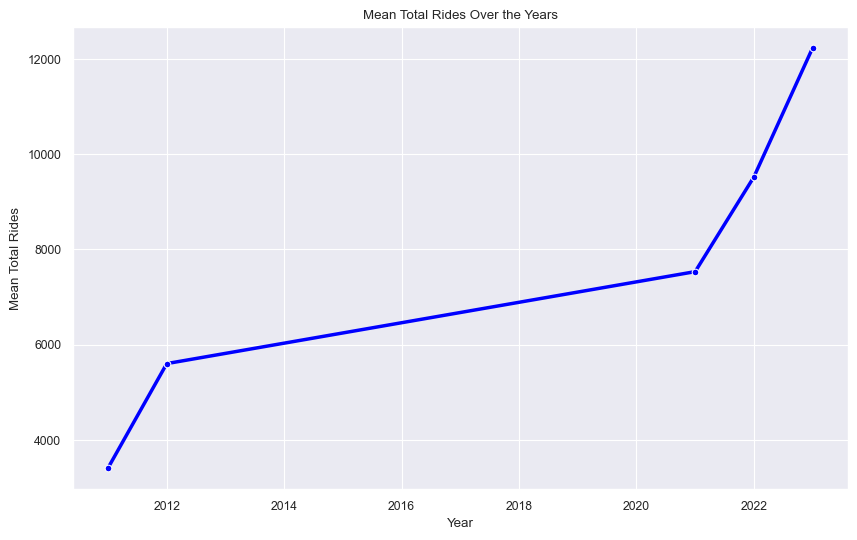

Growth Rates:
From 2011 to 2012: 64.43%
From 2012 to 2021: 34.54%
From 2021 to 2022: 26.43%
From 2022 to 2023: 28.49%


In [80]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Data
years = [2011, 2012, 2021, 2022, 2023]
mean_Total_rides = [3405.76, 5599.93, 7533.92, 9525.43, 12239.27]

# Create a DataFrame
data = pd.DataFrame({'Year': years, 'Mean_Total_rides': mean_Total_rides})

# Plot the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='Mean_Total_rides', marker='o', color='blue')
plt.title('Mean Total Rides Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Total Rides')
plt.grid(True)
plt.show()

# Calculate growth rate
growth_rates = []
for i in range(1, len(mean_Total_rides)):
    growth_rate = ((mean_Total_rides[i] - mean_Total_rides[i-1]) / mean_Total_rides[i-1]) * 100
    growth_rates.append(growth_rate)

print("Growth Rates:")
for year, rate in zip(years[1:], growth_rates):
    print(f"From {years[years.index(year)-1]} to {year}: {rate:.2f}%")


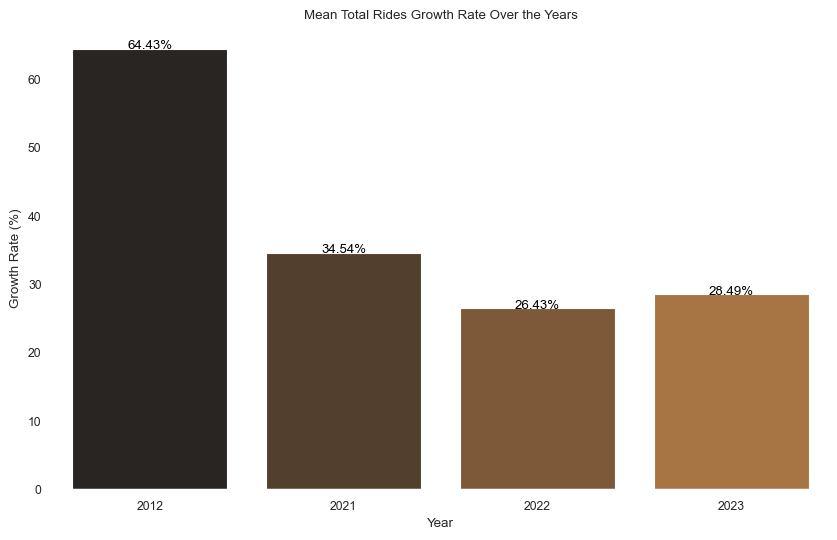

In [87]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Data
years = [2012, 2021, 2022, 2023]
growth_rates = [((b - a) / a) * 100 for a, b in zip(mean_Total_rides[:-1], mean_Total_rides[1:])]

# Create a DataFrame
growth_data = pd.DataFrame({'Year': years, 'Growth Rate (%)': growth_rates})

# Define the color palette with shades from dark copper to lighter shades
palette = sns.dark_palette('#b87333', n_colors=len(growth_rates))

# Plot the bar chart with the defined palette
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=growth_data, x='Year', y='Growth Rate (%)', palette=palette)
plt.title('Mean Total Rides Growth Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(axis='y')

# Add percentage labels on top of each bar
for index, row in growth_data.iterrows():
    bar_plot.text(row.name, row['Growth Rate (%)'], f'{row["Growth Rate (%)"]:.2f}%', color='black', ha="center")

# Set the background color to white
plt.gca().set_facecolor('white')

plt.show()


Estimation 

In [88]:
# Data for the years 2022 and 2023
year_2022 = 2023
mean_rides_2022 = 12239.27

year_2023 = 2024
mean_rides_2023 = 13646.18  # This is just a hypothetical value for illustration

# Estimated growth rate for 2024 (linear interpolation)
estimated_growth_rate = ((mean_rides_2023 - mean_rides_2022) / mean_rides_2022) * 100

print(f"Estimated growth rate for 2024: {estimated_growth_rate:.2f}%")


Estimated growth rate for 2024: 11.50%
